In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读入1维列表(相当于R中的scan）
Global = np.loadtxt("data/global.dat")
Global = Global.ravel()
index = pd.date_range(start="1856",periods=len(Global),freq="M")
Global = pd.Series(Global,index=index)

In [4]:
temp = Global[Global.index.year>=1970]

In [5]:
temp.head()

1970-01-31    0.068
1970-02-28    0.172
1970-03-31   -0.040
1970-04-30    0.043
1970-05-31   -0.042
Freq: M, dtype: float64

In [10]:
t = np.arange(1,len(temp)+1)

使用ols（最小二乘法）拟合

In [11]:
import statsmodels.api as sm

X=sm.add_constant(t)
model = sm.OLS(temp,X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     907.7
Date:                Tue, 30 Jun 2020   Prob (F-statistic):          4.99e-108
Time:                        10:22:54   Log-Likelihood:                 280.95
No. Observations:                 432   AIC:                            -557.9
Df Residuals:                     430   BIC:                            -549.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1435      0.012    -11.762      0.000      -0.167      -0.120
x1             0.0015   4.88e-05     30.128      0.000       0.001       0.002
==============================================================================
Omnibus:                        7.515   Durbin-Watson:                   0.577
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.901
Skew:                           0.247   Prob(JB):                       0.0192
Kurtosis:                       3.442   Cond. No.                         501.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

拟合模型的残差存在明显的自相关，这样估计出来的参数的置信区间偏小

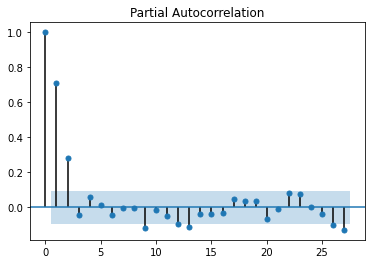

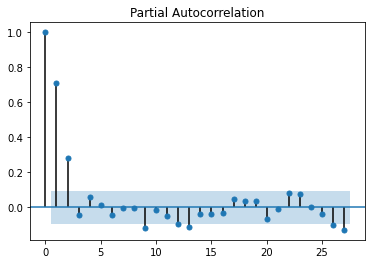

In [15]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plot_pacf(fit.resid)

使用广义最小二乘法拟合参数

In [31]:
model=sm.GLSAR(temp,X,rho=2)
fit=model.iterative_fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           GLSAR Regression Results                           
==============================================================================
Dep. Variable:                      y   R-squared:                       0.179
Model:                          GLSAR   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     93.20
Date:                Tue, 30 Jun 2020   Prob (F-statistic):           4.42e-20
Time:                        12:08:45   Log-Likelihood:                 451.02
No. Observations:                 430   AIC:                            -898.0
Df Residuals:                     428   BIC:                            -889.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1590      0.040     -3.981      0.000      -0.237      -0.080
x1             0.0015      0.000      9.654      0.000       0.001       0.002
==============================================================================
Omnibus:                       14.073   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.043
Skew:                           0.291   Prob(JB):                     7.33e-05
Kurtosis:                       3.851   Cond. No.                         523.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""